# Intro
This notebook shows an overview of the following datasets: movie.metadata, character.metadata, plot_summaries
# Cleaning

In [7]:
import os
from matplotlib import pyplot as plt
import pandas as pd
import ast

from cleaning import clean_movie_metadata

current_directory = os.getcwd()
movie_data_directory = os.path.join(current_directory, 'Data')

#clean_all_datasets(data_directory)
#tvtropes_cleaned, name_clusters_cleaned, character_metadata_cleaned, plot_summaries_cleaned, movie_metadata_cleaned = clean_all_datasets(data_directory)

# Movie metadata
Date, box office, length, languages, country of origin, genre
## Movies
### Number per year
Continuous graph

## Number of movies released per year
Continuous graph


Cleaned Movie Metadata dataset:
   movie_id                                         movie_name  \
0    975900                                     Ghosts of Mars   
1   3196793  Getting Away with Murder: The JonBenét Ramsey ...   
2  28463795                                        Brun bitter   
3   9363483                                   White Of The Eye   
4    261236                                  A Woman in Flames   

            countries_clean  \
0  United States of America   
1  United States of America   
2                    Norway   
3            United Kingdom   
4                   Germany   

                                        genres_clean languages_clean  
0  Thriller, Science Fiction, Horror, Adventure, ...         English  
1     Mystery, Biographical film, Drama, Crime Drama         English  
2                               Crime Fiction, Drama       Norwegian  
3  Thriller, Erotic thriller, Psychological thriller         English  
4                           

C:\Users\Pierre\AppData\Local\Temp\ipykernel_9092\2722782878.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['revenue'] = pd.to_numeric(df_cleaned['revenue'], errors='coerce')


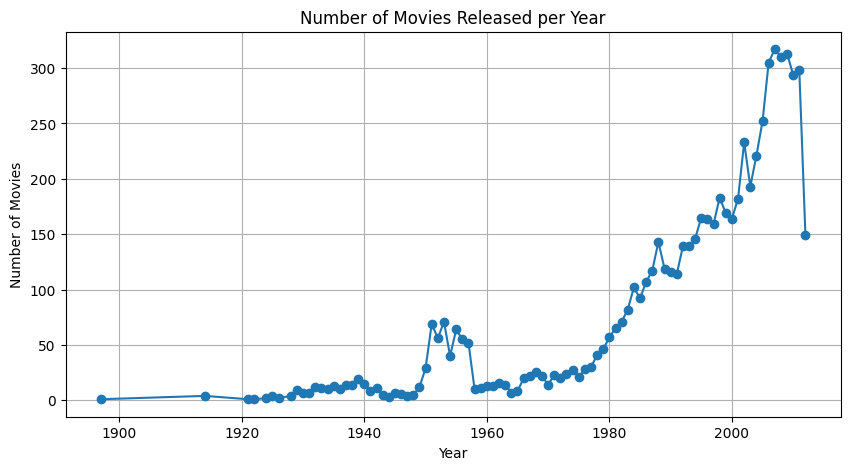

In [8]:
# Clean the dataset
#data_directory = '/your_data_directory'  # Replace with the actual directory path
df_movie_metadata = clean_movie_metadata(movie_data_directory)

# Extract year and filter data for numeric revenue
df_movie_metadata['year'] = pd.to_datetime(df_movie_metadata['release_date'], errors='coerce').dt.year
df_cleaned = df_movie_metadata.dropna(subset=['year', 'revenue'])
df_cleaned['revenue'] = pd.to_numeric(df_cleaned['revenue'], errors='coerce')
df_cleaned = df_cleaned.dropna(subset=['revenue'])

# Plot 1: Number of Movies Released per Year
movies_per_year = df_cleaned.groupby('year').size()
plt.figure(figsize=(10, 5))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o')
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

## Box office
### Availability of data
Number

### Mean std & median per year
continuous graph

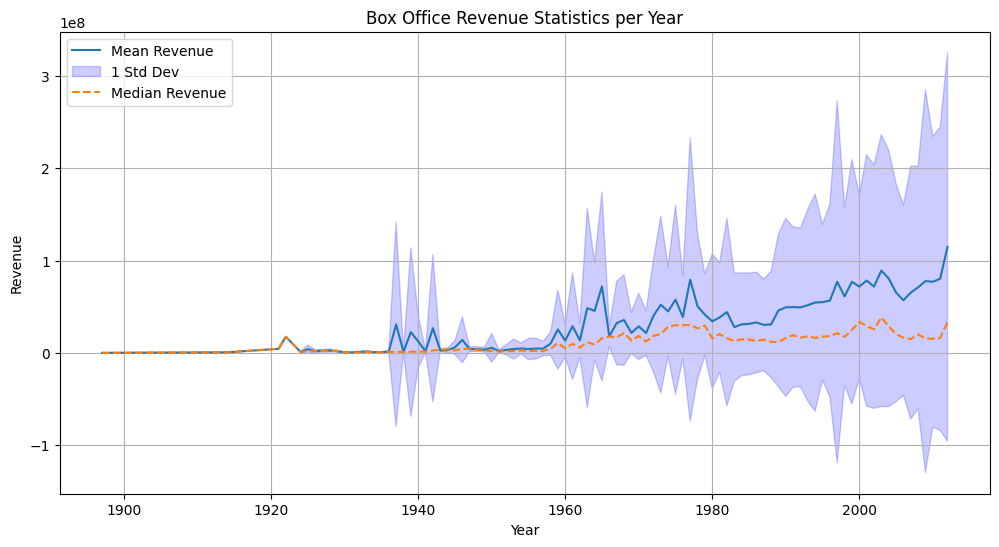

In [9]:
revenue_stats = df_cleaned.groupby('year')['revenue'].agg(['mean', 'std', 'median'])
plt.figure(figsize=(12, 6))
plt.plot(revenue_stats.index, revenue_stats['mean'], label='Mean Revenue')
plt.fill_between(revenue_stats.index, revenue_stats['mean'] - revenue_stats['std'],
                 revenue_stats['mean'] + revenue_stats['std'], color='b', alpha=0.2, label='1 Std Dev')
plt.plot(revenue_stats.index, revenue_stats['median'], label='Median Revenue', linestyle='--')
plt.title('Box Office Revenue Statistics per Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

### Total per year

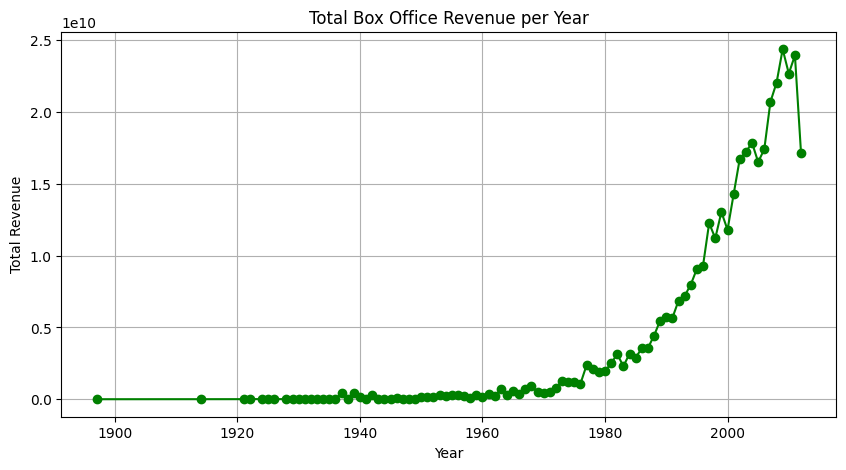

In [10]:
# Plot: Total Box Office Revenue per Year
total_revenue_per_year = df_cleaned.groupby('year')['revenue'].sum()

plt.figure(figsize=(10, 5))
plt.plot(total_revenue_per_year.index, total_revenue_per_year.values, marker='o', color='green')
plt.title('Total Box Office Revenue per Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

# Languages

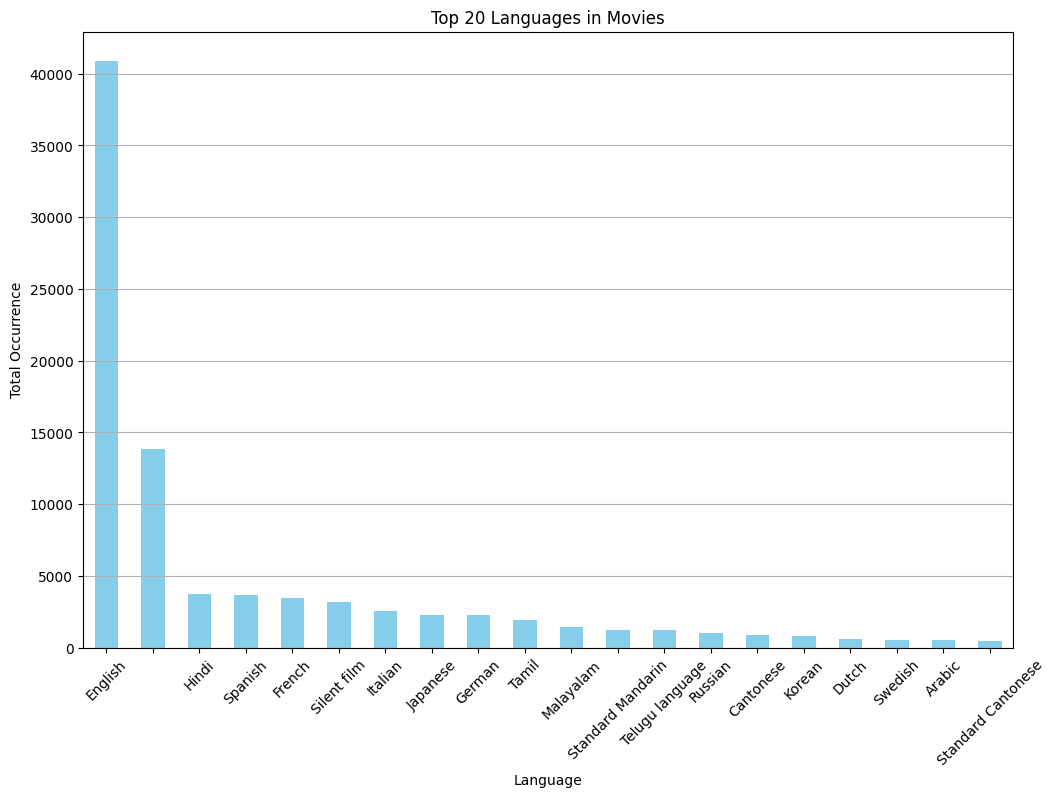

In [14]:
# Split the languages and explode the dataframe to count each language separately
df_languages = df_movie_metadata['languages_clean'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
df_languages.name = 'language'

# Count the occurrences of each language
language_counts = df_languages.value_counts().head(20)

# Plot the bar plot
plt.figure(figsize=(12, 8))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Top 20 Languages in Movies')
plt.xlabel('Language')
plt.ylabel('Total Occurrence')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
# Extract year and country of origin
df_movie_metadata['year'] = pd.to_datetime(df_movie_metadata['release_date'], errors='coerce').dt.year
df_movie_metadata['country'] = df_movie_metadata['countries_clean']

# Filter data for non-null years and countries
df_country_year = df_movie_metadata.dropna(subset=['year', 'country'])

# Group by year and country, then count the number of movies
movies_per_year_country = df_country_year.groupby(['year', 'country']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(15, 8))
movies_per_year_country.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Number of Movies Released per Year by Country of Origin')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Actors

# Plots

# Correlations
## Revenue/Languages number
## Revenue/